In [1]:
import torch
print(torch.cuda.is_available()) # should be True
# t = torch.rand(10, 10).cuda()
# print(t.device) # should be CUDA]
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn.functional as F
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import torchio as tio
from typing import List, Tuple
from numpy import ndarray
from nilearn.image import resample_to_img
from sklearn.model_selection import StratifiedKFold

True


In [2]:
mask_pre_nifti = nib.load('../data/raw/preop/BTC-preop/derivatives/tumor_masks/sub-PAT06/anat/sub-PAT06_space_T1_label-tumor.nii')
head_pre_nifti = nib.load('../data/processed/preop/BTC-preop/sub-PAT06/t1_ants_aligned.nii.gz')
mask_post_nifti = nib.load('../data/raw/postop/BTC-postop/derivatives/tumor_masks/sub-PAT06/anat/sub-PAT06_space_T1_label-tumor.nii')
head_post_nifti = nib.load('../data/processed/postop/BTC-postop/sub-PAT06/t1_ants_aligned.nii.gz')
print(mask_pre_nifti.shape)
mask_post_resampled = resample_to_img(mask_post_nifti, head_post_nifti, interpolation='nearest')
mask_pre_resampled = resample_to_img(mask_pre_nifti, head_pre_nifti, interpolation='nearest')

head_pre_nifti = head_pre_nifti.get_fdata()
mask_pre_resampled_data = mask_pre_resampled.get_fdata()

head_post_nifti = head_post_nifti.get_fdata()
mask_post_resampled_data = mask_post_resampled.get_fdata()



(160, 256, 256)


In [3]:
# Print the orientation of head pre NIfTI
orientation_head_pre = nib.aff2axcodes(mask_pre_nifti.affine)
print("Orientation of head pre NIfTI:", orientation_head_pre)

# Print the orientation of head post NIfTI
orientation_head_post = nib.aff2axcodes(mask_post_nifti.affine)
print("Orientation of head post NIfTI:", orientation_head_post)

# Print the orientation of tumor pre resampled
orientation_tumor_pre_resampled = nib.aff2axcodes(mask_pre_resampled.affine)
print("Orientation of tumor pre resampled:", orientation_tumor_pre_resampled)

Orientation of head pre NIfTI: ('L', 'A', 'S')
Orientation of head post NIfTI: ('L', 'A', 'S')
Orientation of tumor pre resampled: ('L', 'A', 'S')


(160, 232, 205)
(160, 232, 205)


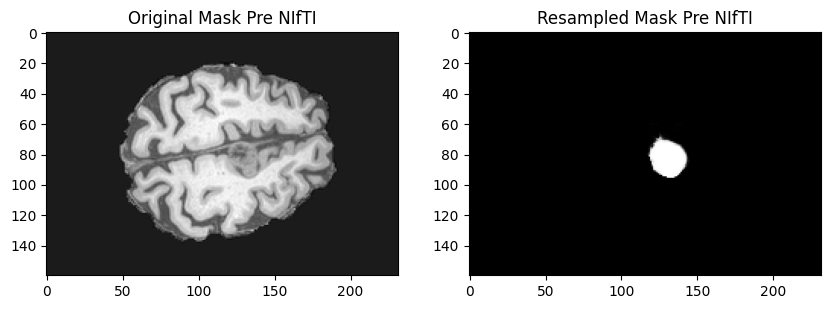

In [4]:
slice_index = 140

# Extract the data from the NIfTI images
print(head_pre_nifti.shape)
print(mask_pre_resampled_data.shape)
# Plot the slices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Mask Pre NIfTI')
plt.imshow(head_pre_nifti[:, :, slice_index], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Resampled Mask Pre NIfTI')
plt.imshow(mask_pre_resampled_data[:, :, slice_index], cmap='gray')

plt.show()

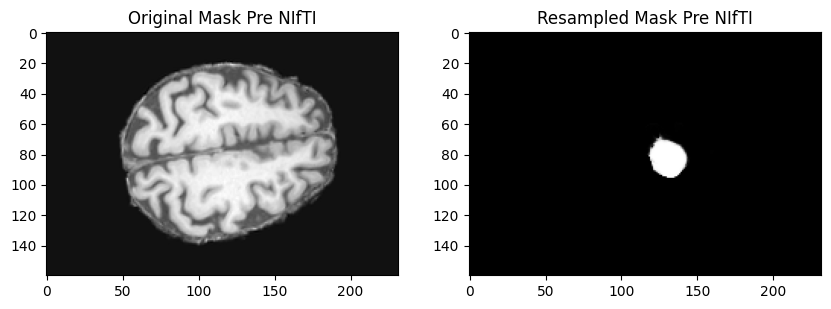

In [5]:

# Plot the slices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Mask Pre NIfTI')
plt.imshow(head_post_nifti[:, :, slice_index], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Resampled Mask Pre NIfTI')
plt.imshow(mask_post_resampled_data[:, :, slice_index], cmap='gray')

plt.show()